In [31]:
import pickle
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import matplotlib.pyplot as plt
from numpy.random import permutation
import yaml


"""
    Utility Functions
"""

from sklearn.metrics import confusion_matrix
def balanced_accuracy_score(y_true, y_pred, sample_weight=None,
                            adjusted=False):
    C = confusion_matrix(y_true, y_pred, sample_weight=sample_weight)
    with np.errstate(divide='ignore', invalid='ignore'):
        per_class = np.diag(C) / C.sum(axis=1)
    if np.any(np.isnan(per_class)):
        warnings.warn('y_pred contains classes not in y_true')
        per_class = per_class[~np.isnan(per_class)]
    score = np.mean(per_class)
    if adjusted:
        n_classes = len(per_class)
        chance = 1 / n_classes
        score -= chance
        score /= 1 - chance
    return score


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-4zo7r6pp because the default path (/gpfs/home/lc3424/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
# t1, flair predictions

t1 = pickle.load(open('res_t1_finetune.pkl', 'rb'))
flair = pickle.load(open('res_flair_finetune.pkl', 'rb'))

In [15]:
flair_df

,Session,flair_path,Subject,scan_date_time,Label,t1_path,Path,flair_CN,flair_MCI,flair_AD
0,273846704746,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,20d22e8c23a942b8aec67e25c4fbe848,2014-07-14 14:43:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,0.354434,0.057450,-0.396703
1,154923170543,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,417dac95a7964b9bac8b1b5492f62d9e,2015-02-17 13:36:00,2,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,-0.912930,0.942756,-0.041093
2,106247447811,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,ed03ec99ac314c2dbb3e0a11d60bf629,2016-05-16 15:26:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,0.281183,0.041848,-0.248066
3,741726966118,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,de0a2559e63c444a897b1a941928a7cc,2018-07-29 10:40:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,1.787419,0.212351,-2.060506
4,741726966118,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,de0a2559e63c444a897b1a941928a7cc,2018-07-29 10:40:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,1.940727,0.213429,-2.221268
...,...,...,...,...,...,...,...,...,...,...
331,670239373774,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,4322ad3b29f145729418746157c77be4,2016-07-20 12:35:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,1.472579,0.242959,-1.718708
332,670239373774,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,4322ad3b29f145729418746157c77be4,2016-07-20 12:35:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,1.678539,0.246979,-1.930020
333,670239373774,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,4322ad3b29f145729418746157c77be4,2016-07-20 12:35:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,1.302518,0.076289,-1.384745
334,131802134598,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,5b8aff1ab19b431f98b8bea4558a22f0,2015-07-30 12:11:00,1,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...,0.093992,0.983050,-1.218148


In [28]:
t1_df = t1['res'].loc[:, ['Session', 'Subject', 'Label']]
t1_df[['t1_CN', 't1_MCI', 't1_AD']] = t1['out']
flair_df = flair['res'].loc[:, ['Session', 'Subject', 'Label']]
flair_df[['flair_CN', 'flair_MCI', 'flair_AD']] = flair['out']


In [30]:
t1_flair_df = t1_df.merge(flair_df, how='left', on= ['Session', 'Subject', 'Label'])
t1_flair_df

,Session,Subject,Label,t1_CN,t1_MCI,t1_AD,flair_CN,flair_MCI,flair_AD
0,273846704746,20d22e8c23a942b8aec67e25c4fbe848,1,-0.244462,0.794048,-0.590001,0.354434,0.057450,-0.396703
1,154923170543,417dac95a7964b9bac8b1b5492f62d9e,2,-0.397731,1.118512,-0.853688,-0.912930,0.942756,-0.041093
2,106247447811,ed03ec99ac314c2dbb3e0a11d60bf629,1,-2.615643,1.341761,1.346375,0.281183,0.041848,-0.248066
3,741726966118,de0a2559e63c444a897b1a941928a7cc,1,1.192102,0.539488,-1.803411,1.787419,0.212351,-2.060506
4,741726966118,de0a2559e63c444a897b1a941928a7cc,1,1.192102,0.539488,-1.803411,1.940727,0.213429,-2.221268
...,...,...,...,...,...,...,...,...,...
837,670239373774,4322ad3b29f145729418746157c77be4,1,-1.283413,1.360306,-0.207117,1.472579,0.242959,-1.718708
838,670239373774,4322ad3b29f145729418746157c77be4,1,-1.283413,1.360306,-0.207117,1.678539,0.246979,-1.930020
839,670239373774,4322ad3b29f145729418746157c77be4,1,-1.283413,1.360306,-0.207117,1.302518,0.076289,-1.384745
840,131802134598,5b8aff1ab19b431f98b8bea4558a22f0,1,-1.084948,1.341214,-0.429101,0.093992,0.983050,-1.218148


In [90]:
t1_flair_df_session = t1_flair_df.groupby('Session').nth(0).reset_index()
t1_flair_df_session

,Session,Subject,Label,t1_CN,t1_MCI,t1_AD,flair_CN,flair_MCI,flair_AD
0,102180780180,20d22e8c23a942b8aec67e25c4fbe848,1,-0.089180,0.839657,-0.832243,0.260247,0.241310,-0.501770
1,102303089179,20d22e8c23a942b8aec67e25c4fbe848,1,-0.218788,0.858931,-0.715347,0.593948,-0.016079,-0.571370
2,104966525235,a66bc9ff91114c82b606f65c193414a6,0,1.314306,-0.062131,-1.186901,1.527284,-0.074471,-1.451337
3,106247447811,ed03ec99ac314c2dbb3e0a11d60bf629,1,-2.615643,1.341761,1.346375,0.281183,0.041848,-0.248066
4,106270119686,01875353714a476090710e1bd5d2d88d,0,1.431363,-0.031245,-1.337470,2.376166,-0.103299,-2.242126
...,...,...,...,...,...,...,...,...,...
217,959174196263,7b7d05ca3aaa4af78cb4dbb47fcdd532,0,0.518912,0.393187,-0.866002,1.438292,-0.277709,-1.145088
218,962308353130,8ddaebfcd4fd464da83762d08aeeb504,1,-0.506391,1.280348,-0.993399,0.065494,1.166410,-1.421687
219,976519179703,e64038d6e2094855bd45f8ae96dcb85f,1,-1.011115,0.770743,0.327980,1.732817,-0.242957,-1.499116
220,984345266628,9bd98591cf1f4a6194b77ff05096e95b,0,1.726907,0.285471,-2.217380,1.858533,-0.444514,-1.349077


In [ ]:
# find best weight, criteria being macro AUC

In [41]:
def calc_aucs(target_all,logit_all):
    y = label_binarize(target_all, classes=[0,1,2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for k in range(3):
        fpr[k], tpr[k], _ = roc_curve(y[:, k], logit_all[:, k])
        roc_auc[k] = auc(fpr[k], tpr[k])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), logit_all.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[k] for k in range(3)]))

    mean_tpr = np.zeros_like(all_fpr)
    for k in range(3):
        mean_tpr += interp(all_fpr, fpr[k], tpr[k])

    # Finally average it and compute AUC
    mean_tpr /= 3

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return roc_auc

In [42]:
calc_aucs(t1_flair_df.Label.to_numpy(), t1_flair_df[['t1_CN', 't1_MCI', 't1_AD']].to_numpy())

/tmp/ipykernel_73449/187286933.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[k], tpr[k])


{0: 0.9244025695931477,
 1: 0.8785861151427188,
 2: 0.8413309697006744,
 'micro': 0.9193760190926478,
 'macro': 0.882555016525375}

In [91]:
df = t1_flair_df_session
weight = 0
target_all = df.Label.to_numpy()
t1_logit_all = df[['t1_CN', 't1_MCI', 't1_AD']].to_numpy()
flair_logit_all = df[['flair_CN', 'flair_MCI', 'flair_AD']].to_numpy()
eval_dict = {}

while weight <= 1:
    logit_all = weight * t1_logit_all + (1 - weight) * flair_logit_all
    res = calc_aucs(target_all=target_all, logit_all=logit_all)
    eval_dict[weight] = res
    weight = np.round(weight + 0.01, 2)
    
    
    

/tmp/ipykernel_73449/187286933.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[k], tpr[k])
/tmp/ipykernel_73449/187286933.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[k], tpr[k])
/tmp/ipykernel_73449/187286933.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[k], tpr[k])
/tmp/ipykernel_73449/187286933.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[k], tpr[k])
/tmp/ipykernel_73449/187286933.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[k], tpr[k])
/tmp/ipykernel_73449/187286933.py:17: De

In [92]:
micro_auc_dict = {k: v['macro'] for k, v in eval_dict.items()}
micro_auc_dict

{0: 0.7026337577853278,
 0.01: 0.7061422565197742,
 0.02: 0.7097288678093607,
 0.03: 0.7141576190673163,
 0.04: 0.7186483141919018,
 0.05: 0.7229351866234361,
 0.06: 0.7261484002534545,
 0.07: 0.7298851117337443,
 0.08: 0.7342079852756884,
 0.09: 0.737628925330627,
 0.1: 0.7422964330700171,
 0.11: 0.7468261032514038,
 0.12: 0.7503878915804865,
 0.13: 0.753934631280447,
 0.14: 0.7585413877409257,
 0.15: 0.7614065552712345,
 0.16: 0.7659548834838716,
 0.17: 0.7702876026134805,
 0.18: 0.7750267210775593,
 0.19: 0.7782011207311352,
 0.2: 0.782403912955195,
 0.21: 0.785529637317218,
 0.22: 0.7875365321954458,
 0.23: 0.7910545739593045,
 0.24: 0.7938993391996683,
 0.25: 0.7971441910562238,
 0.26: 0.799960131585372,
 0.27: 0.803083302361387,
 0.28: 0.8055876878032214,
 0.29: 0.8086576919426413,
 0.3: 0.8119215706533727,
 0.31: 0.8138459336014535,
 0.32: 0.81696363394686,
 0.33: 0.8196825247087807,
 0.34: 0.8225504976985777,
 0.35: 0.8244444011679856,
 0.36: 0.8271561854812038,
 0.37: 0.829851

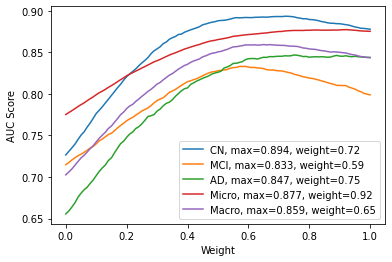

In [94]:
for metrics in [0, 1, 2, 'micro', 'macro']:
    auc_dict = {k: v[metrics] for k, v in eval_dict.items()}
    if metrics == 0:
        label = 'CN'
    elif metrics == 1:
        label = 'MCI'
    elif metrics == 2:
        label = 'AD'
    else:
        label = metrics.capitalize()
    max_val = sorted(auc_dict.items(), key=lambda x:x[1])[-1]

    label += ', max={:.3f}, weight={:.2f}'.format(max_val[1], max_val[0])

    plt.plot(auc_dict.keys(), auc_dict.values(), label=label)


plt.legend(loc='lower right')
plt.xlabel('Weight')
plt.ylabel('AUC Score')
plt.savefig('figures/multimodal_baseline_auc_vs_weight_unique_session.png')
plt.show()

# 